In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
afinn = pd.read_csv('sentiment_result/afinn_sentiment.csv')
textbolb = pd.read_csv('sentiment_result/textbolb_sentiment.csv')
vader = pd.read_csv('sentiment_result/vader_sentiment.csv')

In [3]:
textbolb.head()

,Neighborhood,PolarityScore,SubjectivityScore
0,DitmasPark,0.315562,0.471123
1,Gowanus,0.245833,0.391667
2,SheepsheadBay,0.222828,0.430970
3,BrooklynHeights,0.209033,0.429529
4,DowntownBrooklyn,0.205835,0.394803


In [4]:
# make negative value to zero
afinn['SentimentScore'] = afinn['SentimentScore'].clip(lower = 0)
vader['OverallScore'] = vader['OverallScore'].clip(lower = 0)

# regulize the data
x = afinn['SentimentScore'].sum()
y = textbolb['PolarityScore'].sum()
z = textbolb['SubjectivityScore'].sum()
w = vader['OverallScore'].sum()

afinn['SentimentScore'] /= x
textbolb['PolarityScore'] /= w
textbolb['SubjectivityScore'] /= w
vader['OverallScore'] /= z

In [5]:
merge = vader.merge(textbolb,on='Neighborhood').merge(afinn,on='Neighborhood')

In [6]:
merge

,Neighborhood,OverallScore,PolarityScore,SubjectivityScore,SentimentScore
0,SheepsheadBay,0.048380,0.012173,0.023543,0.047776
1,Woodhaven,0.044153,0.004559,0.020340,0.040951
2,RedHookBK,0.042458,0.010868,0.024945,0.057854
3,EastVillage,0.037344,0.007392,0.024962,0.038742
4,CarrollGardens,0.036142,0.007821,0.024127,0.042507
5,CobbleHill,0.032704,0.007636,0.019959,0.029860
6,Inwood,0.032664,0.009769,0.022326,0.022455
7,ProspectHeights,0.032471,0.009356,0.021256,0.033273
8,SunsetPark,0.030522,0.007013,0.024608,0.029263
9,ChelseaNYC,0.028326,0.011109,0.018955,0.022022


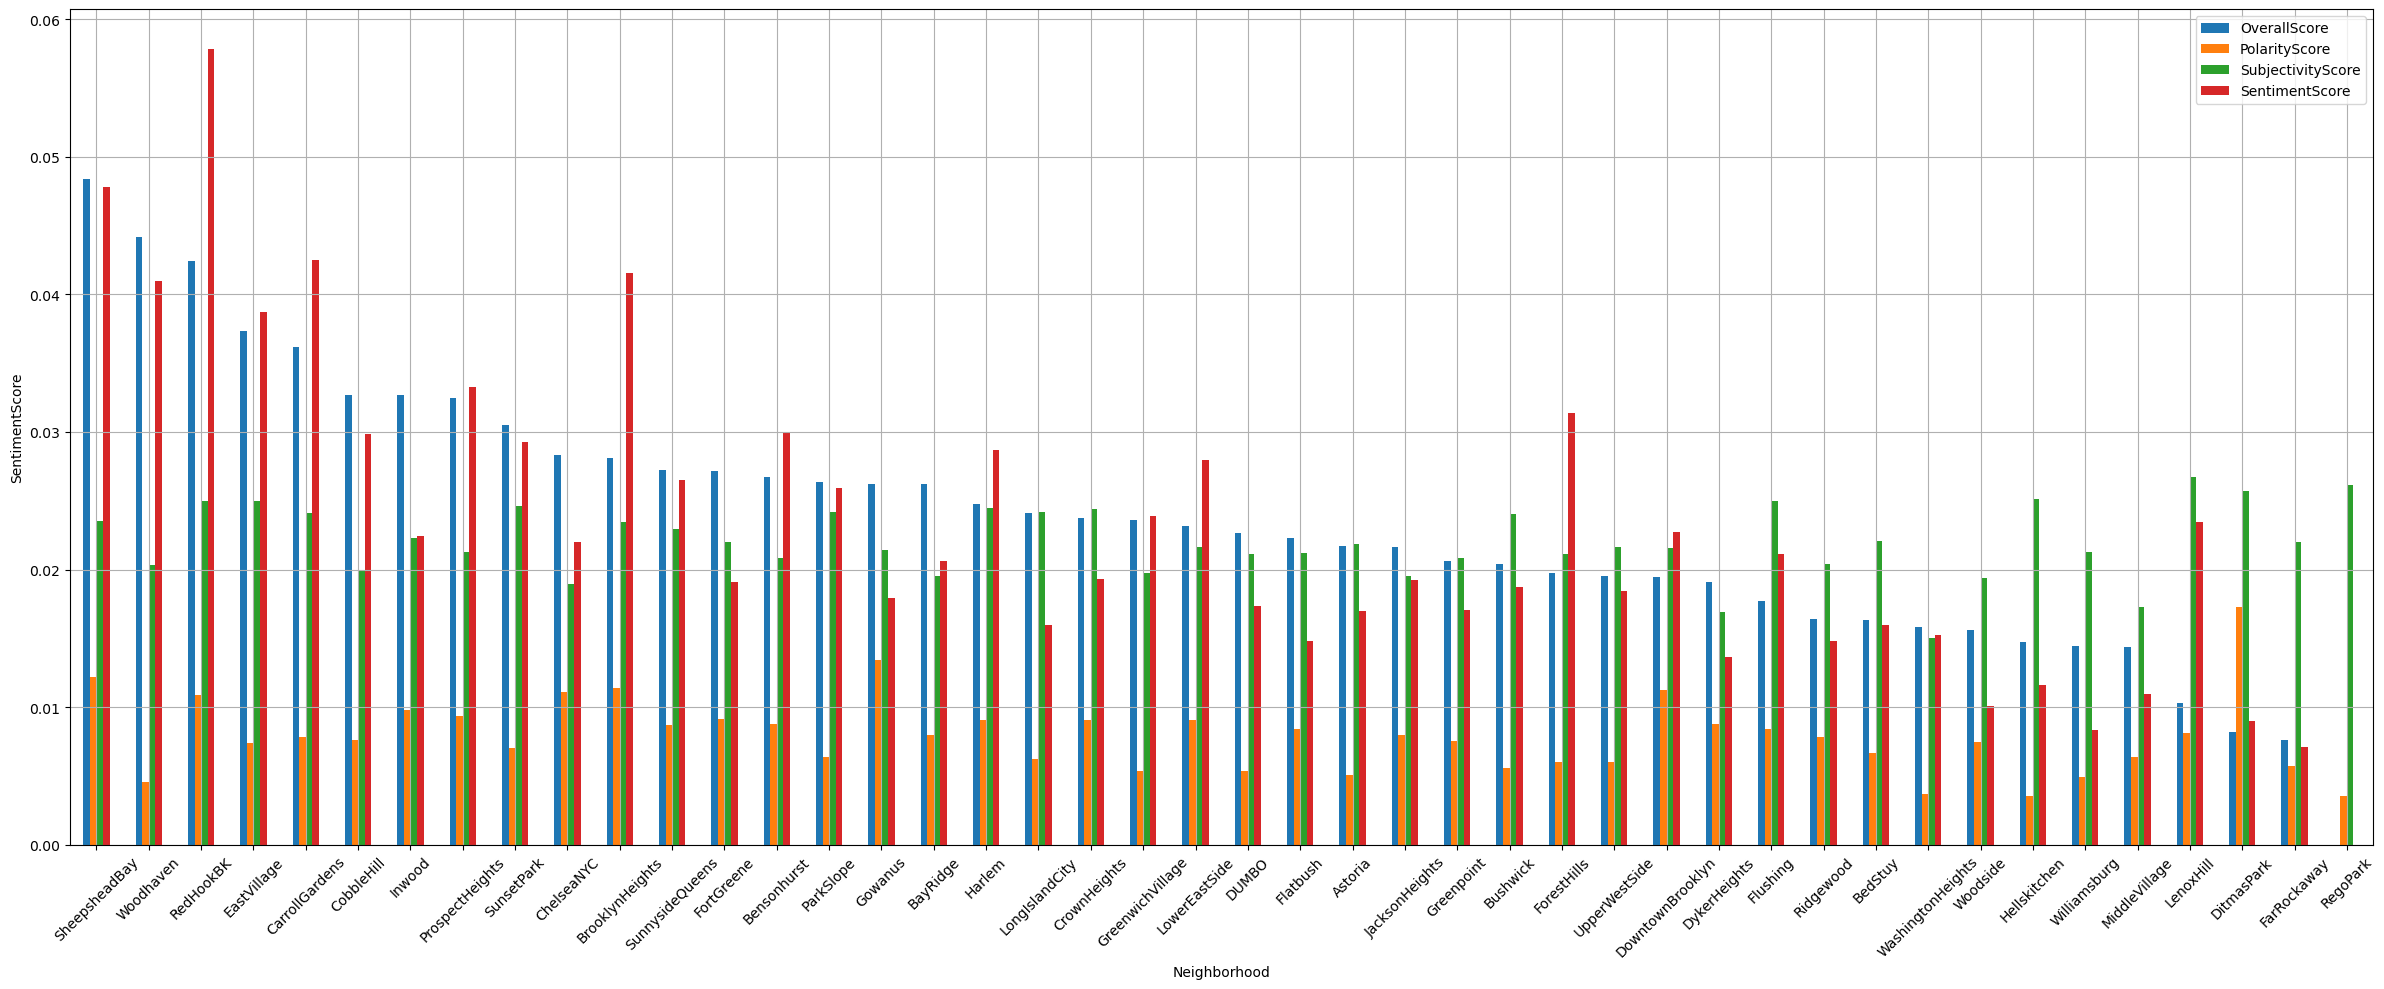

In [7]:
# plot
fig, ax = plt.subplots(figsize=(24, 10))
merge.set_index("Neighborhood").plot(kind="bar", ax=ax)
ax.set_xlabel("Neighborhood")
ax.set_ylabel("SentimentScore")
plt.ylim(bottom = 0)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid()
plt.savefig('Overview.png')
plt.show()

In [8]:
data = merge[~merge['Neighborhood'].str.isdigit()]
# caculate correlation matrix
correlation_matrix = data.corr()
print("Correlation Matrix:\n", correlation_matrix)

# visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.savefig('Correlation_matrix.png')
plt.show()

ValueError: could not convert string to float: 'SheepsheadBay'